# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Farhad Fallah 
2.   Student Number: 97102214


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
#from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

#ap = # Your Code
plays = plays.sort_values(by=['artistID','userID'],ignore_index= True)
artists_dict= artists.set_index('id').T
artists_dict=artists_dict.to_dict('list')
ap = dict()
ap['id'] =plays['artistID']
ap['name']=plays['artistID']
ap['userID'] = plays['userID']
ap['artistID'] = plays['artistID']
ap['weight'] = plays['weight']

ap = pd.DataFrame(ap)
print(len(ap))
ap = ap.replace({'name':artists_dict})



92834


In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})


In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap = ap.drop('id',axis=1)
ap = ap.sort_values(by=['playCount'],ascending=[False],ignore_index=True )
ap

,name,userID,artistID,playCount
0,Depeche Mode,1642,72,352698
1,Thalía,2071,792,324663
2,U2,1094,511,320725
3,Blur,1905,203,257978
4,Paramore,1664,498,227829
...,...,...,...,...
92829,Destiny's Child,1810,913,1
92830,Sia,1290,697,1
92831,Chris Spheeris,510,4988,1
92832,Haylie Duff,1851,17080,1


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


#artist_rank = # Your Code
#creating totalUniqueUsers map
totalUniqueUsers = ap.groupby(['name']).count()
totalUniqueUsers = totalUniqueUsers.rename(columns={"userID": "totalUniqueUsers"})
totalUniqueUsers = totalUniqueUsers.drop(['artistID','playCount'],axis=1)
totalUniqueUsers_dict = totalUniqueUsers.T.to_dict('int')
totalUniqueUsers_dict =totalUniqueUsers_dict['totalUniqueUsers']

#creating totalArtistsPlay map

totalArtistPlays = pd.DataFrame(ap.groupby(['name'])['playCount'].sum())
totalArtistPlays = totalArtistPlays.rename(columns={"playCount": "totalArtistPlays"})
totalArtistPlays_dict = totalArtistPlays.T.to_dict('int')
totalArtistPlays_dict = totalArtistPlays_dict['totalArtistPlays']


names = ap['name'].unique()

artist_rank = dict()
artist_rank['name'] = names
artist_rank['totalUniqueUsers'] = names
artist_rank['totalArtistPlays'] = names
artist_rank['avgUserPlays'] = names
artist_rank = pd.DataFrame(artist_rank)
artist_rank["totalUniqueUsers"] = artist_rank["name"].map(totalUniqueUsers_dict)
artist_rank["totalArtistPlays"] = artist_rank["name"].map(totalArtistPlays_dict)

artist_rank['avgUserPlays'] =artist_rank["totalArtistPlays"] /  artist_rank["totalUniqueUsers"]
artist_rank= artist_rank.sort_values(by=['totalArtistPlays'],ascending=[False],ignore_index= True )
artist_rank = artist_rank.set_index('name')

C:\Users\Asus\AppData\Local\Temp/ipykernel_9592/351830735.py:15: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  totalUniqueUsers_dict = totalUniqueUsers.T.to_dict('int')
C:\Users\Asus\AppData\Local\Temp/ipykernel_9592/351830735.py:22: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  totalArtistPlays_dict = totalArtistPlays.T.to_dict('int')


In [8]:
artist_rank


,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Александр Панайотов,1,1,1.000000
Morris,1,1,1.000000
My Mine,1,1,1.000000


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap['totalUniqueUsers'] = ap["name"].map(totalUniqueUsers_dict)
ap["totalArtistPlays"] = ap["name"].map(totalArtistPlays_dict)
ap['avgUserPlays'] = ap["totalArtistPlays"] /  ap["totalUniqueUsers"]

In [10]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Depeche Mode,1642,72,352698,282,1301308,4614.567376
1,Thalía,2071,792,324663,26,350035,13462.884615
2,U2,1094,511,320725,185,493024,2664.994595
3,Blur,1905,203,257978,114,318221,2791.412281
4,Paramore,1664,498,227829,399,963449,2414.659148
5,Evanescence,1146,378,203165,226,513476,2272.017699
6,Christina Aguilera,514,292,176133,407,1058405,2600.503686
7,Shakira,1983,701,172496,319,688529,2158.398119
8,Shakira,757,701,169596,319,688529,2158.398119
9,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


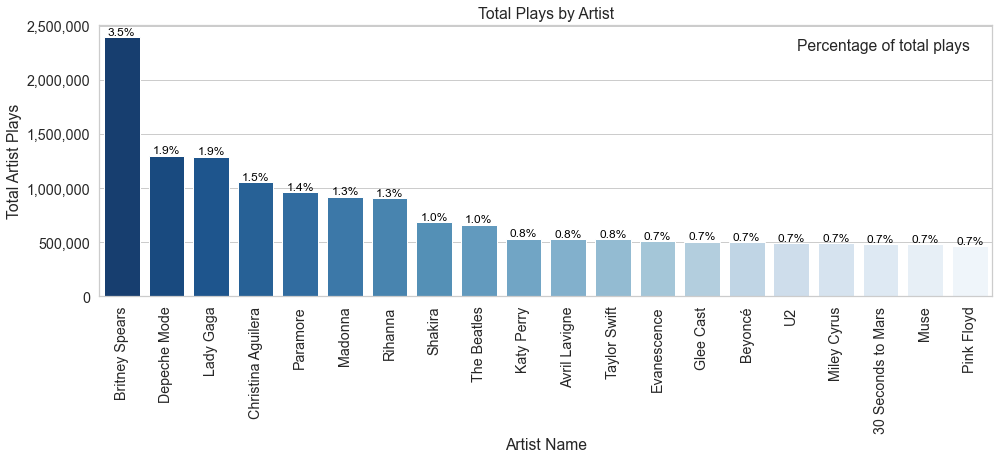

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


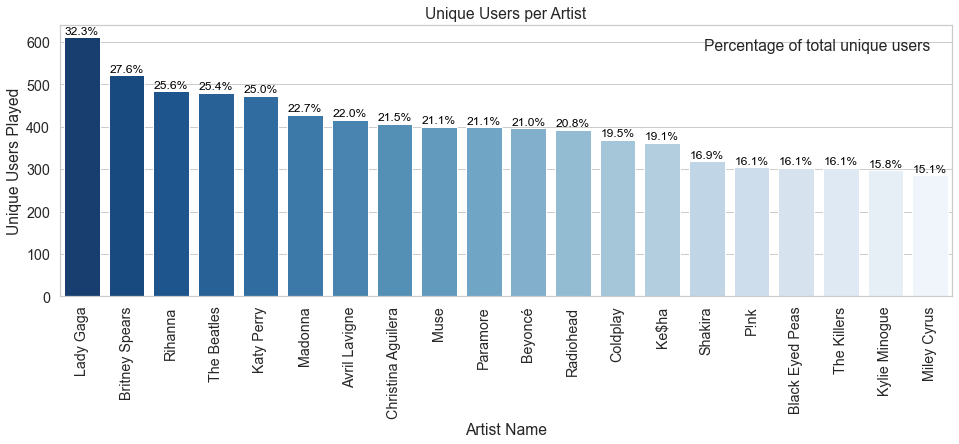

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


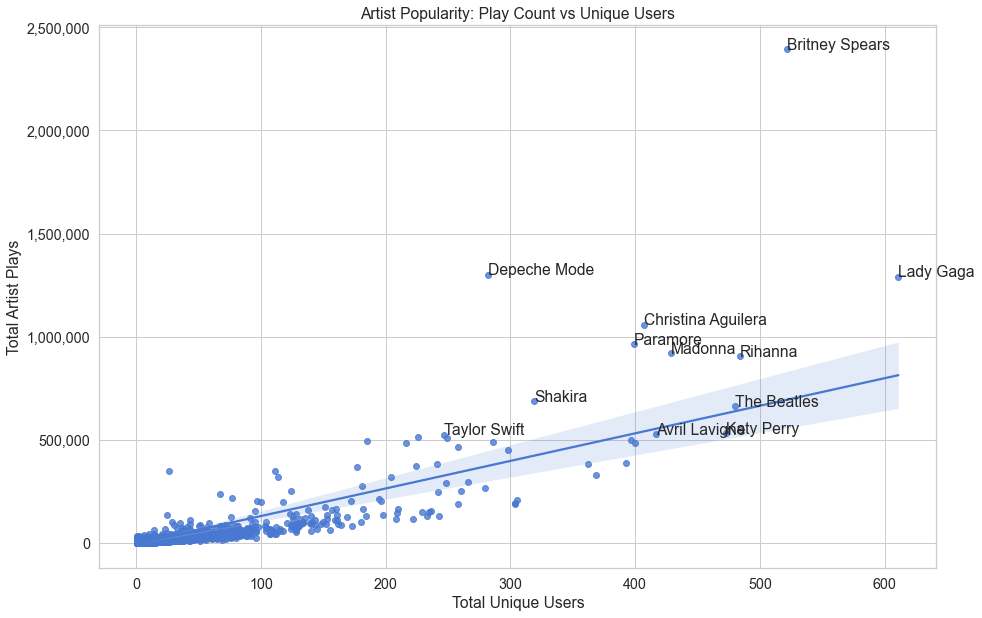

In [14]:
top_artists =  artist_rank.head(12).index # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays  # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i,t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))


# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot(index = 'userID' ,  columns = 'artistID' , values = 'playCountScaled' )


In [17]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0)
ratings = ratings.to_numpy()
ratings.shape

(1892, 17632)

In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity =  ( np.count_nonzero(ratings) / float(ratings.size) )*100
print("sparsity is :",sparsity,'%')


## END

sparsity is : 0.2763750225421394 %


# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    
    # TODO
    train = ratings * 1
    validation = np.zeros_like(ratings)
    for i,row in enumerate(ratings):
        nonzeros =  np.count_nonzero(row)
        if nonzeros > MIN_USER_RATINGS:
            loc = np.where(row > 0)[0]
            index = np.random.choice(loc, size=DELETE_RATING_COUNT, replace=False)
            validation[i,index] = ratings[i,index]*1
            train[i,index] = ratings[i,index]*0
    return train, validation

In [21]:

train, val = train_test_split(ratings)


In [22]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    loc = np.where(ground_truth !=0)
    prediction = prediction[loc].reshape(loc[0].shape[0],1)
    ground_truth = ground_truth[loc].reshape(loc[0].shape[0],1)
    return sqrt(mean_squared_error(prediction, ground_truth))

In [23]:
import time
class Recommender:
  
    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.train_loss = []
        self.val_loss = []
        self.P=[]
        self.Q = []
    def predictions(self, P, Q):
        return np.matmul(Q.T, P).T
    
    def fit(self, X_train, X_val):
        #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
        #TODO : save the loss on train and validation data in each iteration
        Q = np.random.normal(0,1,(self.n_latent_features,train.shape[1]))
        P = np.random.normal(0,1,(self.n_latent_features,train.shape[0]))
        loc = np.where(X_train !=0)
        x = loc[0]
        y = loc[1] 
        nonzero_train_indx = np.array(([x,y])).T 
        for epoch in range(self.n_epochs):
            t1 = time.time()
            prediction = self.predictions(P,Q)
            train_loss = rmse(prediction,X_train)
            val_loss = rmse(prediction,X_val)
            self.train_loss. append(train_loss)
            self.val_loss .append(val_loss)
            for u,i in (nonzero_train_indx):
                eui = X_train[u,i] - prediction[u,i]
                pu = P[:,u]
                qi = Q[:,i]
                new_pu = pu + self.learning_rate*(eui *qi - self.lmbda * pu)
                new_qi = qi + self.learning_rate*(eui *pu - self.lmbda * qi)
                P[:,u] = new_pu
                Q[:,i] = new_qi
                self.P = P
                self.Q = Q
            duration = time.time() - t1
            
            print (f"|epoch {epoch+1}/200 :\t process time:{duration } \n|  \t train_loss is: {train_loss } \t val_loss is: {val_loss }|") 
            print("="*80)
        
        self.P = P
        self.Q = Q   
        return self

    def predict(self, X_train, user_index):
        P = self.P
        Q = self.Q
        pu = P[:,user_index]
        q = np.matmul(pu.T , Q)
        return q

In [24]:
#creating recommender object
recommender = Recommender().fit(train, val)

|epoch 1/200 :	 process time:1.5997374057769775 
|  	 train_loss is: 1.7400330618270552 	 val_loss is: 1.7443915877059328|
|epoch 2/200 :	 process time:1.5484962463378906 
|  	 train_loss is: 1.549762658208171 	 val_loss is: 1.5670462595369772|
|epoch 3/200 :	 process time:1.5603041648864746 
|  	 train_loss is: 1.4192707036074075 	 val_loss is: 1.447399324943737|
|epoch 4/200 :	 process time:1.5515060424804688 
|  	 train_loss is: 1.3194388685365326 	 val_loss is: 1.3567907933390793|
|epoch 5/200 :	 process time:1.4523561000823975 
|  	 train_loss is: 1.2382452027384339 	 val_loss is: 1.2834911186128952|
|epoch 6/200 :	 process time:1.5674123764038086 
|  	 train_loss is: 1.1696471207329677 	 val_loss is: 1.221699509591058|
|epoch 7/200 :	 process time:1.6837103366851807 
|  	 train_loss is: 1.1101885613369589 	 val_loss is: 1.1681536721368118|
|epoch 8/200 :	 process time:1.8237411975860596 
|  	 train_loss is: 1.0577030878542317 	 val_loss is: 1.1208394424283346|
|epoch 9/200 :	 pro

|epoch 42/200 :	 process time:2.326054573059082 
|  	 train_loss is: 0.4013187343211928 	 val_loss is: 0.5038565736503566|
|epoch 43/200 :	 process time:2.3854846954345703 
|  	 train_loss is: 0.3932593371346345 	 val_loss is: 0.49566782046727004|
|epoch 44/200 :	 process time:2.3458054065704346 
|  	 train_loss is: 0.38545755891615874 	 val_loss is: 0.48771500065818263|
|epoch 45/200 :	 process time:1.7284107208251953 
|  	 train_loss is: 0.3779015303530918 	 val_loss is: 0.47998776953954386|
|epoch 46/200 :	 process time:1.6529889106750488 
|  	 train_loss is: 0.37058011881166786 	 val_loss is: 0.4724764107779972|
|epoch 47/200 :	 process time:1.7069499492645264 
|  	 train_loss is: 0.36348286966568144 	 val_loss is: 0.46517178655094565|
|epoch 48/200 :	 process time:1.6571111679077148 
|  	 train_loss is: 0.3565999533862579 	 val_loss is: 0.4580652926246606|
|epoch 49/200 :	 process time:1.691681146621704 
|  	 train_loss is: 0.3499221177191256 	 val_loss is: 0.4511488177703985|
|ep

|epoch 82/200 :	 process time:1.5678284168243408 
|  	 train_loss is: 0.20541197470827965 	 val_loss is: 0.29474115291235975|
|epoch 83/200 :	 process time:1.5903403759002686 
|  	 train_loss is: 0.20255580519025293 	 val_loss is: 0.2914803383960777|
|epoch 84/200 :	 process time:1.5081610679626465 
|  	 train_loss is: 0.19975916839250116 	 val_loss is: 0.28827901894938235|
|epoch 85/200 :	 process time:1.5113942623138428 
|  	 train_loss is: 0.19702035678564 	 val_loss is: 0.28513560212240463|
|epoch 86/200 :	 process time:1.6412498950958252 
|  	 train_loss is: 0.19433772612177214 	 val_loss is: 0.28204855190668654|
|epoch 87/200 :	 process time:1.6333508491516113 
|  	 train_loss is: 0.191709692537032 	 val_loss is: 0.27901638623092495|
|epoch 88/200 :	 process time:1.650383710861206 
|  	 train_loss is: 0.18913472981317966 	 val_loss is: 0.2760376745915256|
|epoch 89/200 :	 process time:1.663851022720337 
|  	 train_loss is: 0.18661136678800794 	 val_loss is: 0.27311103580936574|
|

|epoch 122/200 :	 process time:1.5075857639312744 
|  	 train_loss is: 0.12507158863759432 	 val_loss is: 0.19888640823727793|
|epoch 123/200 :	 process time:1.5491163730621338 
|  	 train_loss is: 0.12370112070726737 	 val_loss is: 0.19715654262339882|
|epoch 124/200 :	 process time:1.4908056259155273 
|  	 train_loss is: 0.12235247581191804 	 val_loss is: 0.19545014376414105|
|epoch 125/200 :	 process time:1.6562223434448242 
|  	 train_loss is: 0.1210251858564629 	 val_loss is: 0.193766748085794|
|epoch 126/200 :	 process time:1.6030299663543701 
|  	 train_loss is: 0.11971879559141235 	 val_loss is: 0.19210590413272194|
|epoch 127/200 :	 process time:1.6626877784729004 
|  	 train_loss is: 0.11843286218239482 	 val_loss is: 0.19046717217585638|
|epoch 128/200 :	 process time:1.6846046447753906 
|  	 train_loss is: 0.11716695479676931 	 val_loss is: 0.18885012383625496|
|epoch 129/200 :	 process time:1.5282964706420898 
|  	 train_loss is: 0.11592065420654016 	 val_loss is: 0.187254

|epoch 162/200 :	 process time:1.449676275253296 
|  	 train_loss is: 0.08359431513438126 	 val_loss is: 0.1443130455986739|
|epoch 163/200 :	 process time:1.5860323905944824 
|  	 train_loss is: 0.08282807166128636 	 val_loss is: 0.14325205139098798|
|epoch 164/200 :	 process time:1.568178415298462 
|  	 train_loss is: 0.08207186094291459 	 val_loss is: 0.14220260104077842|
|epoch 165/200 :	 process time:1.5911729335784912 
|  	 train_loss is: 0.08132551000067632 	 val_loss is: 0.1411645144189049|
|epoch 166/200 :	 process time:1.6966044902801514 
|  	 train_loss is: 0.08058884966271501 	 val_loss is: 0.1401376151479597|
|epoch 167/200 :	 process time:1.5796213150024414 
|  	 train_loss is: 0.07986171446203848 	 val_loss is: 0.13912173050540091|
|epoch 168/200 :	 process time:1.6228430271148682 
|  	 train_loss is: 0.07914394253786435 	 val_loss is: 0.13811669132965237|
|epoch 169/200 :	 process time:1.6534111499786377 
|  	 train_loss is: 0.07843537554006269 	 val_loss is: 0.13712233

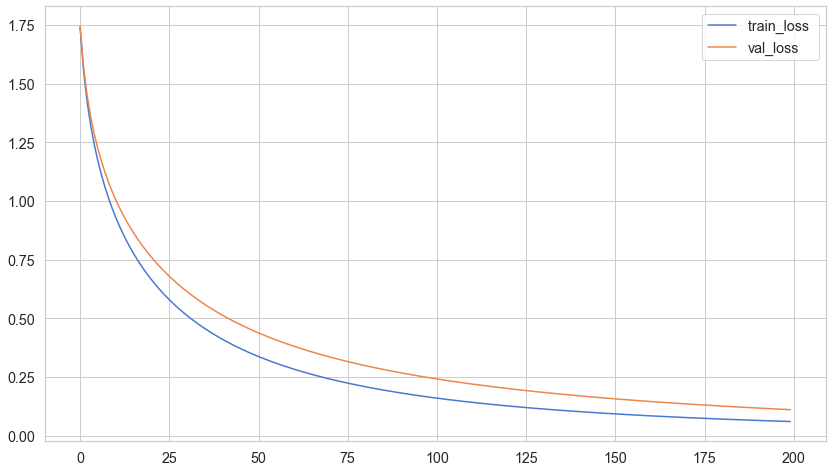

In [25]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
n = np.arange(0,200)
train_loss = recommender.train_loss
val_loss = recommender.val_loss

plt.plot(n,train_loss,n,val_loss)
plt.legend(['train_loss ','val_loss'])
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [26]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [27]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)

    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [28]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [30]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions[predictions_index])


,id,name,rating
0,3453,Samhain,0.031849
1,6946,Kesmeşeker,0.029507
2,7524,Hepcat,0.028198
3,8426,Barış Güney,0.028043
4,8826,The Chamber Strings,0.027750
5,9206,Frank Black,0.027726
6,12213,Michael Fordinal,0.027179
7,15978,Seven Wiser,0.027015
8,16100,Mikey Dread,0.026028
9,18156,Нэнси,0.025646


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**